In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#importing required libs and loading the csv as the data frame
df = pd.read_csv("climate_action_data.csv")
print(df)

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2   

    Crop_Type Fertilizer_Re

In [3]:
#converting to correct types
# Check data types of all columns before
df.dtypes
# For numerical columns types
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)'
                , 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN

#converting date to the correct type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [4]:
#dealing with the missing values
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [5]:
#handling missing values
# For crop type  we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column


# For numerical columns, we can fill missing values with the mean or median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)'
                , 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())



# Check again for missing values for Crop Type
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [6]:
# Remove duplicate rows, keep first occurrence
# Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates(keep='first')


Number of duplicate rows: 111


In [7]:
# Drop rows with null dates
df = df.dropna(subset=['Date'])

# Keep missing dates at the bottom (default)
df = df.sort_values('Date', na_position='last')

# Save DataFrame to CSV file
df.to_csv('cleaned_mine.csv', index=False)



In [8]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)'
                , 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

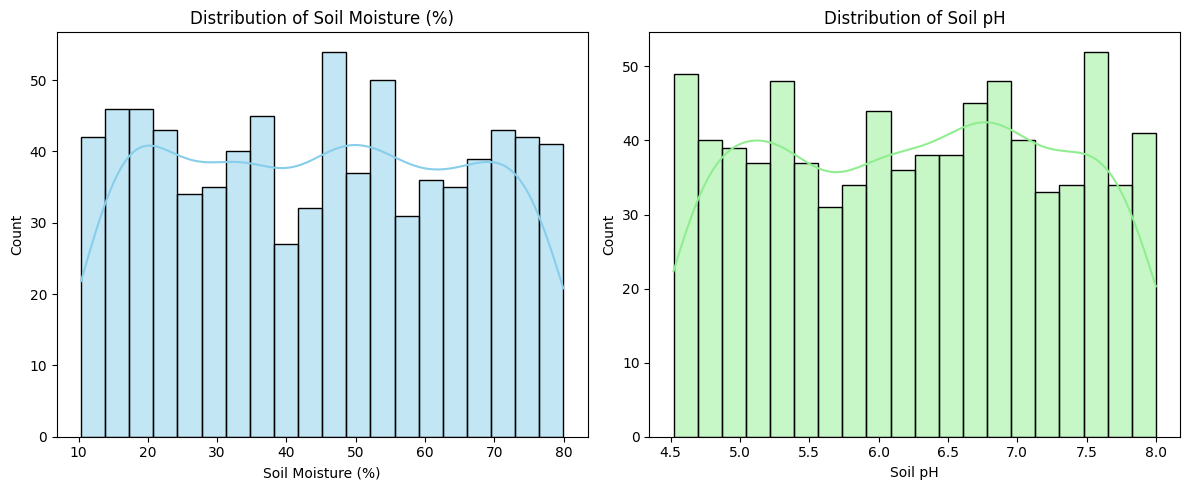

In [9]:
plt.figure(figsize=(12, 5))

# Histogram 1: Soil Moisture
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Soil_Moisture(%)', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Soil Moisture (%)')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Count')

# Histogram 2: Soil pH
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Soil_pH', bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Soil pH')
plt.xlabel('Soil pH')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


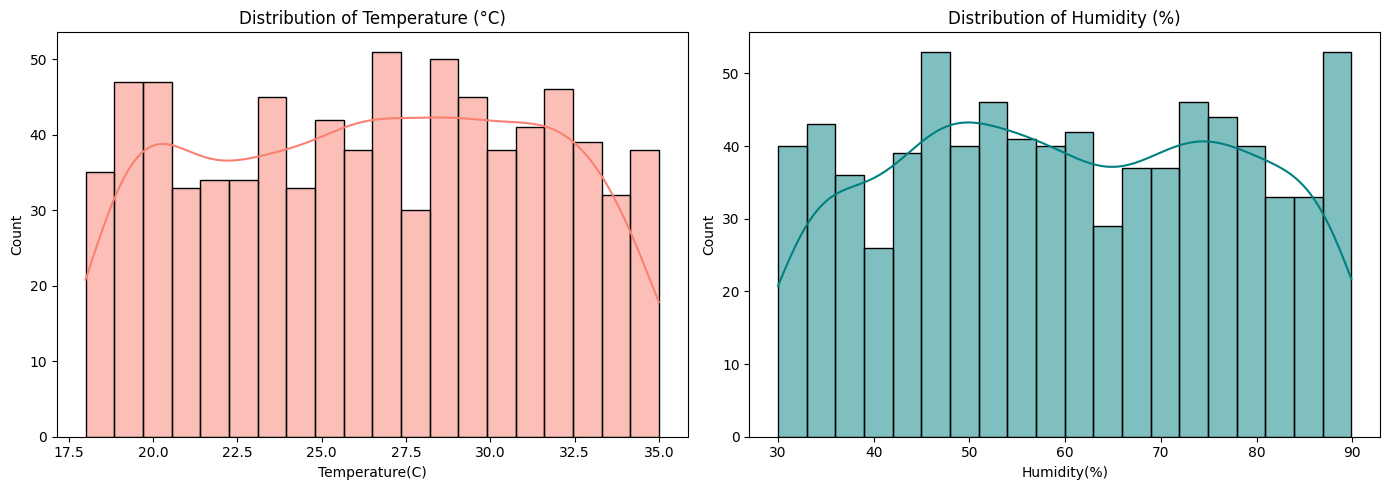

In [10]:
plt.figure(figsize=(14, 5))

# Temperature
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Temperature(C)', bins=20, kde=True, color='salmon')
plt.title('Distribution of Temperature (°C)')

# Humidity
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Humidity(%)', bins=20, kde=True, color='teal')
plt.title('Distribution of Humidity (%)')

plt.tight_layout()
plt.show()


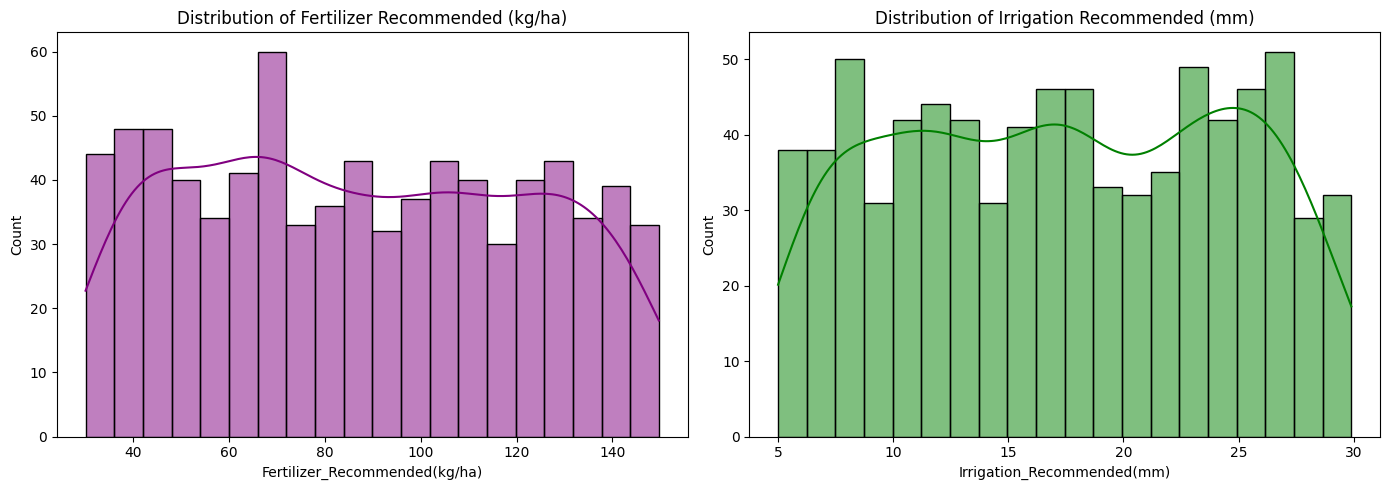

In [11]:
plt.figure(figsize=(14, 5))

# Fertilizer
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Fertilizer_Recommended(kg/ha)', bins=20, kde=True, color='purple')
plt.title('Distribution of Fertilizer Recommended (kg/ha)')

# Irrigation
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Irrigation_Recommended(mm)', bins=20, kde=True, color='green')
plt.title('Distribution of Irrigation Recommended (mm)')

plt.tight_layout()
plt.show()


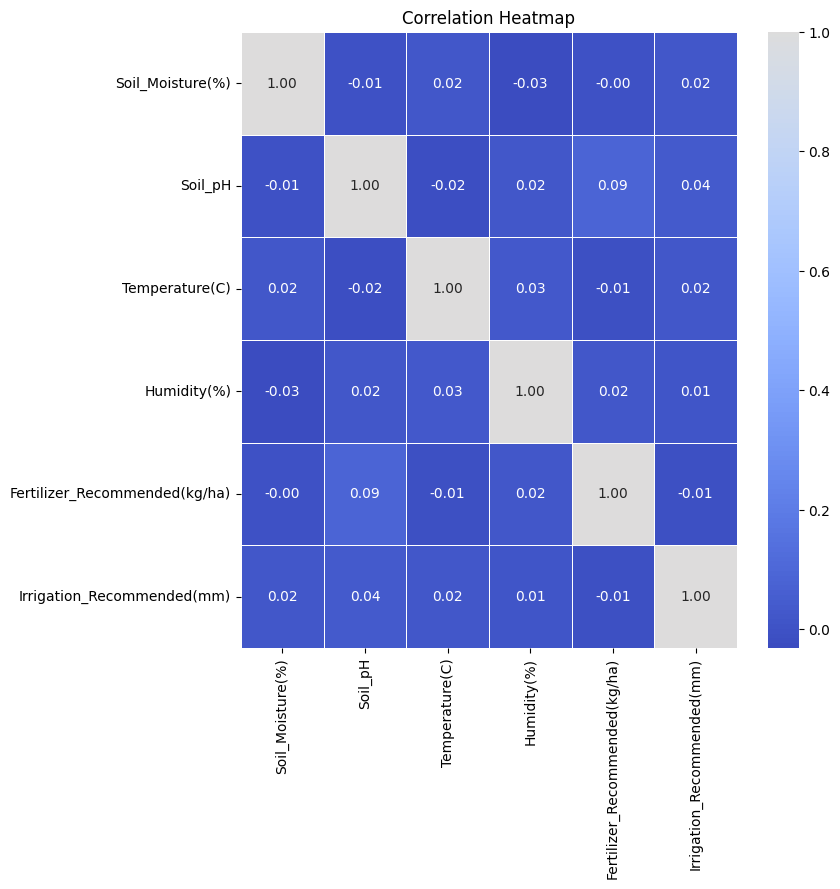

In [12]:
# calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)'
                , 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation heatmap, no single variable shows a strong linear relationship with fertilizer recommendations. The variables with the highest correlations Soil pH (0.09) and Humidity (0.02)  exhibit only very weak associations

Text(0.5, 0, 'Crop Type')

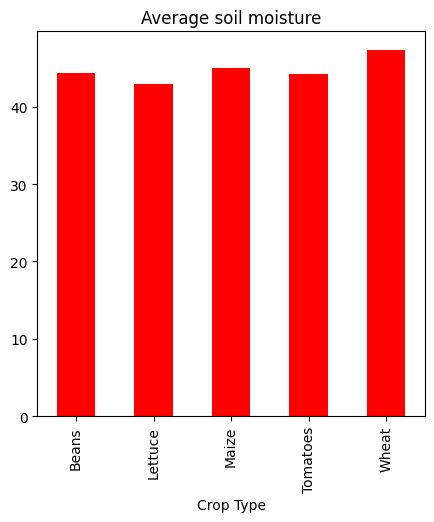

In [13]:
highest_average_soil_moisture  = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
plt.figure(figsize=(5, 5))

highest_average_soil_moisture .plot(kind='bar', color='red')
plt.title('Average soil moisture')
plt.xlabel('Crop Type')


# The crop with the highest average soil moisture is Wheat.

In [14]:
hot_crops = df.groupby('Crop_Type')['Temperature(C)'].mean()
hot_crops[hot_crops > 30]

df.groupby('Crop_Type')['Temperature(C)'].mean().sort_values(ascending=False)




Crop_Type
Maize       27.010323
Beans       26.898675
Tomatoes    26.213253
Wheat       26.171591
Lettuce     26.155333
Name: Temperature(C), dtype: float64

# Based on the current dataset, no crop types experience average temperatures above 30°C.
# -However, if such conditions occur in the future , the following irrigation adjustments are recommended:
# -Increase irrigation frequency, particularly during early morning or late evening  to reduce water loss due to evaporation.
# -Use drip irrigation or mulching to maintain soil moisture levels more efficiently.


#CONCLUSIONS
#1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
#2. Soil pH and humidity showed very weak correlation with fertilizer recommendations (correlation coefficients ≈ 0.09 and 0.02 respectively), suggesting that no strong single variable dominates fertilizer decision-making in this dataset
#3. Wheat had the highest average soil moisture among all crop types
#4. No crop type in the dataset experiences average temperatures above 30°C


#RECOMMENDATIONS
#Make a Visual Dashboard
 #Create simple charts or a small dashboard to help farmers quickly understand what the data is saying about their fields.
#Compare Crop Needs
 #Analyze each crop separately to better understand their unique soil and weather needs.
#Model Integration
 #Explore more advanced machine learning models or deep learning techniques to improve identify complex relationsips
#Explore Seasonal Trends
 #Group the data by seasons (like rainy or dry) to see how conditions change




In [15]:
#export to cleaned csv
# Save DataFrame to CSV file
df.to_csv('cleaned_climate.csv', index=False)